In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
from pylab import rcParams
from sklearn.model_selection import train_test_split as split
import warnings
import itertools
warnings.filterwarnings("ignore")
#from fbprophet import Prophet
from IPython import display
from matplotlib import pyplot
import os
import re
import seaborn as sns
import plotly.express as px
import warnings
from matplotlib.patches import Patch
import yfinance as yf

In [2]:
df1 = pd.read_csv('stock.csv')

In [3]:
df1

,Date,Adj Close,differenced_trasnformation_demand,differenced_demand_filled,differenced_inv_transformation_demand
0,1980-12-12,0.099584,NaN,0.099584,0.099584
1,1980-12-15,0.094388,-0.005195,-0.005195,0.094388
2,1980-12-16,0.087461,-0.006928,-0.006928,0.087461
3,1980-12-17,0.089625,0.002165,0.002165,0.089625
4,1980-12-18,0.092224,0.002598,0.002598,0.092224
...,...,...,...,...,...
10693,2023-05-12,172.570007,-0.940002,-0.940002,172.570007
10694,2023-05-15,172.070007,-0.500000,-0.500000,172.070007
10695,2023-05-16,172.070007,0.000000,0.000000,172.070007
10696,2023-05-17,172.690002,0.619995,0.619995,172.690002


In [4]:
current_datetime = datetime.now()

# Extract the date portion
current_date = current_datetime.date()

# Convert the date to a string
current_date_string = current_date.strftime('%Y-%m-%d')

In [5]:
mask = (df1['Date'] > '2010-01-01') & (df1['Date'] <= current_date_string)
print(df1.loc[mask])

             Date   Adj Close  differenced_trasnformation_demand   
7331   2010-01-04    6.496295                           0.099566  \
7332   2010-01-05    6.507527                           0.011232   
7333   2010-01-06    6.404014                          -0.103513   
7334   2010-01-07    6.392178                          -0.011836   
7335   2010-01-08    6.434675                           0.042497   
...           ...         ...                                ...   
10693  2023-05-12  172.570007                          -0.940002   
10694  2023-05-15  172.070007                          -0.500000   
10695  2023-05-16  172.070007                           0.000000   
10696  2023-05-17  172.690002                           0.619995   
10697  2023-05-18  175.050003                           2.360001   

       differenced_demand_filled  differenced_inv_transformation_demand  
7331                    0.099566                               6.496295  
7332                    0.011232   

In [6]:
y = df1['Adj Close']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
y=scaler.fit_transform(np.array(y).reshape(-1,1))

In [8]:
##splitting dataset into train and test split
training_size=int(len(y)*0.65)
test_size=len(y)-training_size
train_data,test_data=y[0:training_size,:],y[training_size:len(y),:1]

In [9]:
training_size,test_size

(6953, 3745)

In [10]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]    
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)


In [11]:
import numpy

In [12]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [13]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [14]:
from random import random
from numpy import array
from numpy import cumsum
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import Bidirectional

In [15]:
modell = Sequential()
modell.add(Bidirectional(LSTM(100, activation='relu', input_shape=(100,1)))) #elu
#modell.add(Bidirectional(LSTM(50, dropout=0.5)))

#modell.add(Bidirectional(LSTM(100, dropout=0.5)))
#modell.add(BatchNormalization(momentum=0.6))
modell.add(Dense(1))
modell.compile(loss='mean_squared_error', optimizer='adam') #rmsprop adam

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
import tensorflow as tf
bilstm_model = tf.keras.models.load_model('bilstm_1000epoch_mayukh.h5')

In [24]:
bilstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 200)              81600     
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=bilstm_model.fit(X_train,y_train,validation_data=(X_test,ytest),
        callbacks=[monitor],verbose=1,epochs=1000)

In [30]:
train_predict=bilstm_model.predict(X_train)
test_predict=bilstm_model.predict(X_test)

114/114 [==============================] - 3s 24ms/step


In [31]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [32]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1.207848392952237

In [33]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest, test_predict)

47.58216368714618

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

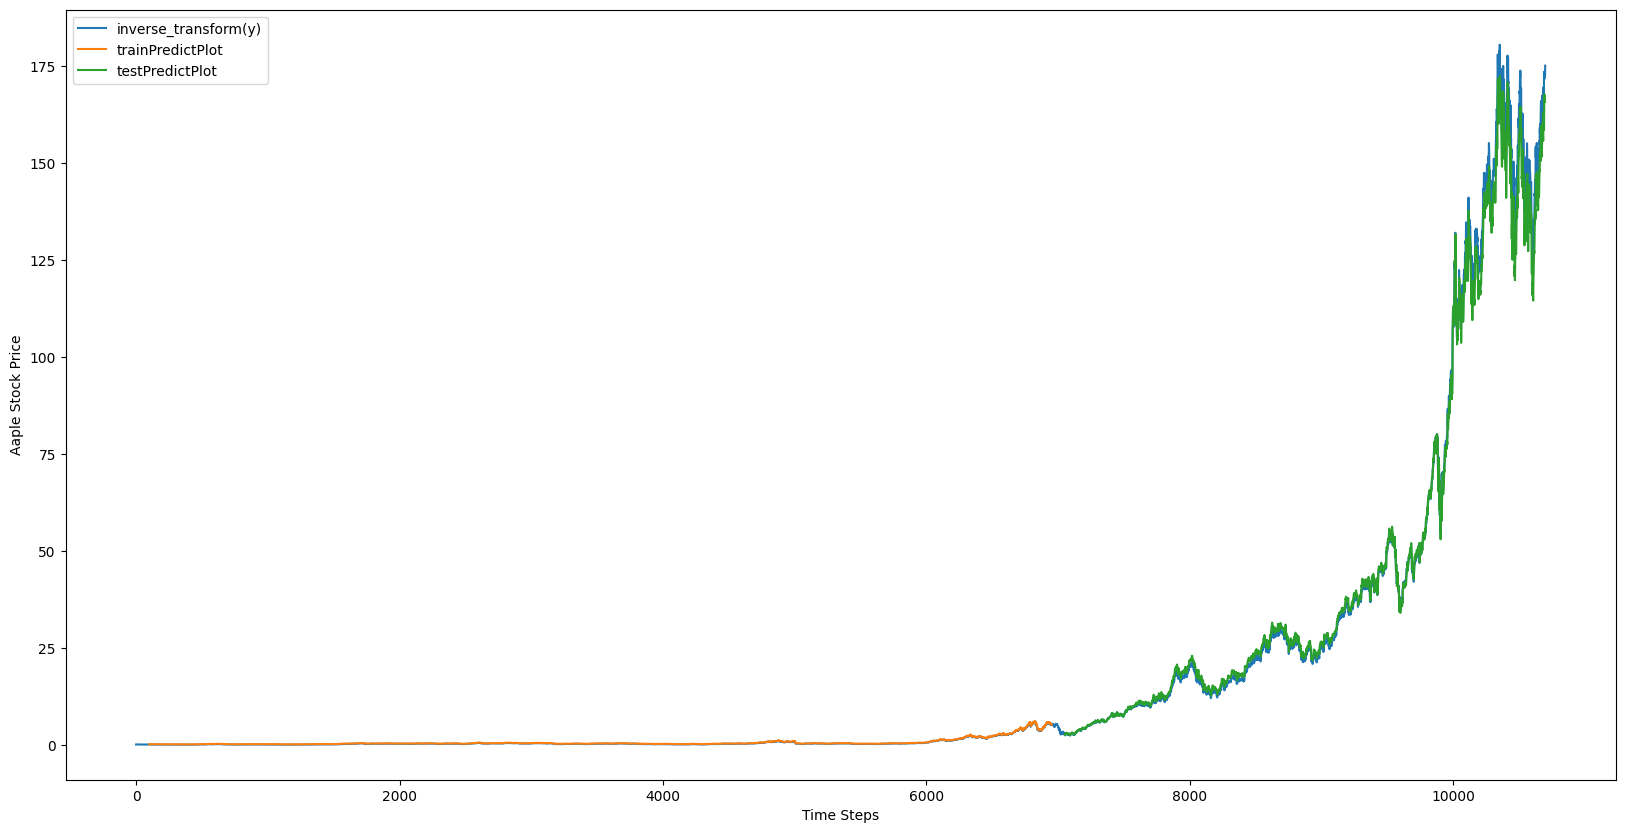

In [36]:
look_back=100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = numpy.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(y)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Aaple Stock Price')
plt.show()

In [38]:
math.sqrt(mean_squared_error(ytest,test_predict))

66.73944398933567

In [39]:
predictions = bilstm_model.predict(X_test)
len(predictions)

114/114 [==============================] - 3s 23ms/step


3644

In [40]:
def evaluate_predictions(predictions, ytest, outliers):
    ratio = []
    differences = []
    for pred in range(len(ytest)):
        ratio.append((ytest[pred]/predictions[pred])-1)
        differences.append(abs(ytest[pred]- predictions[pred]))
    
    
    n_outliers = int(len(differences) * outliers)
    outliers = pd.Series(differences).astype(float).nlargest(n_outliers)
    
    return ratio, differences, outliers

In [41]:
ratio, differences, outliers = evaluate_predictions(predictions, ytest, 0.01)

In [42]:
for index in outliers.index: 
    outliers[index] = predictions[index]
outliers

3317    0.825626
3515    0.705104
3379    0.801595
3396    0.692658
3506    0.764214
3383    0.819070
3400    0.735780
3390    0.722723
3472    0.814600
3528    0.734068
3635    0.878374
3553    0.634425
3415    0.666704
3392    0.740446
3349    0.800036
3412    0.668718
3619    0.839873
3344    0.820101
3318    0.884006
3543    0.672581
3440    0.788435
3571    0.758387
3281    0.865899
3399    0.717703
3548    0.642078
3488    0.731968
3445    0.841227
3461    0.864776
3450    0.860985
3442    0.822720
3487    0.713369
3418    0.708323
3348    0.781167
3477    0.780537
3276    0.836867
3369    0.866178
dtype: float64

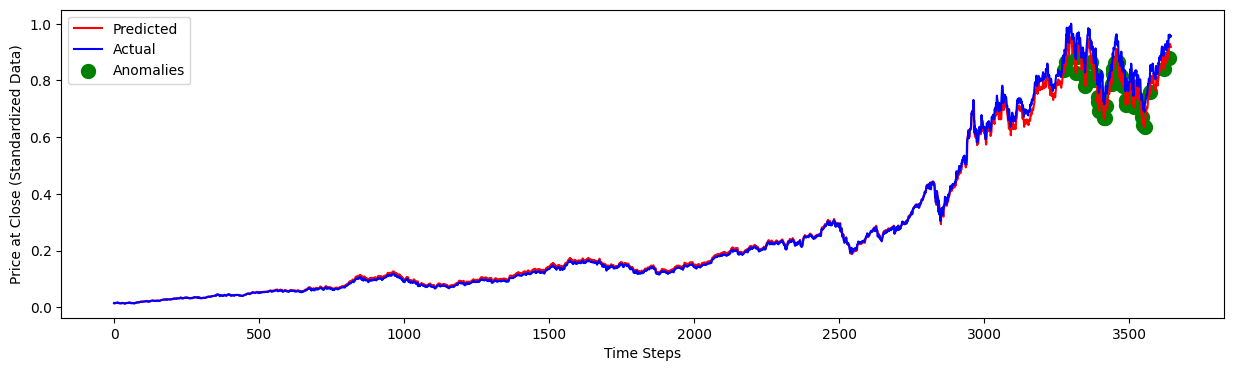

In [43]:
# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

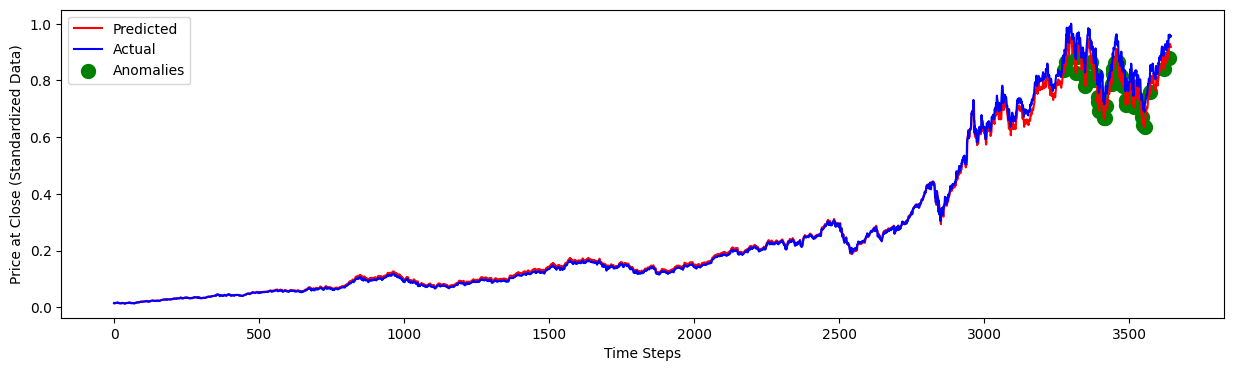

In [44]:
# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

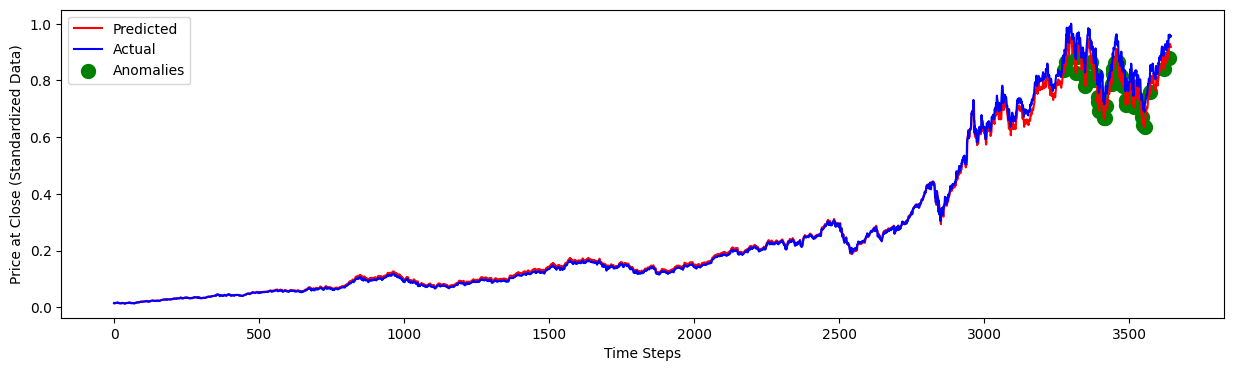

In [45]:
# Showing the predicted vs. actual values
fig, axs = plt.subplots()
fig.set_figheight(4)
fig.set_figwidth(15)

axs.plot(predictions,color='red', label='Predicted')
axs.plot(ytest,color='blue', label='Actual')
axs.scatter(outliers.index,outliers, color='green', linewidth=5.0, label='Anomalies')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.legend(loc='upper left')
plt.show()

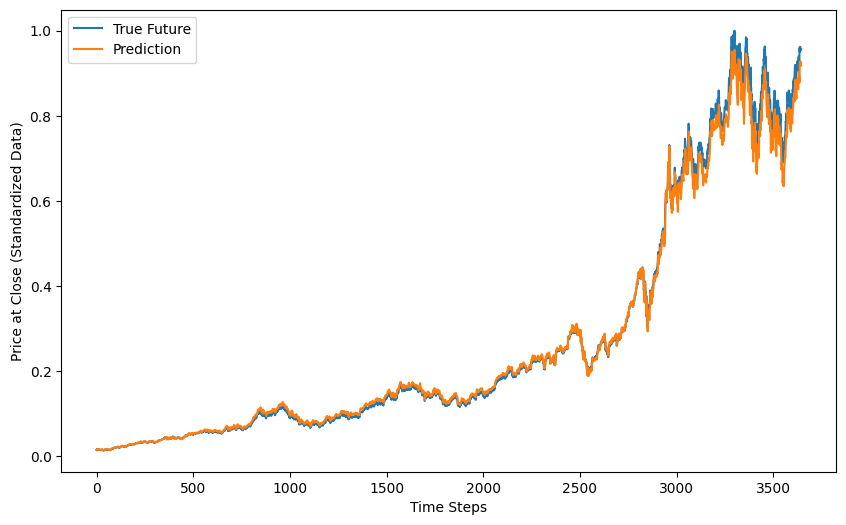

In [46]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()


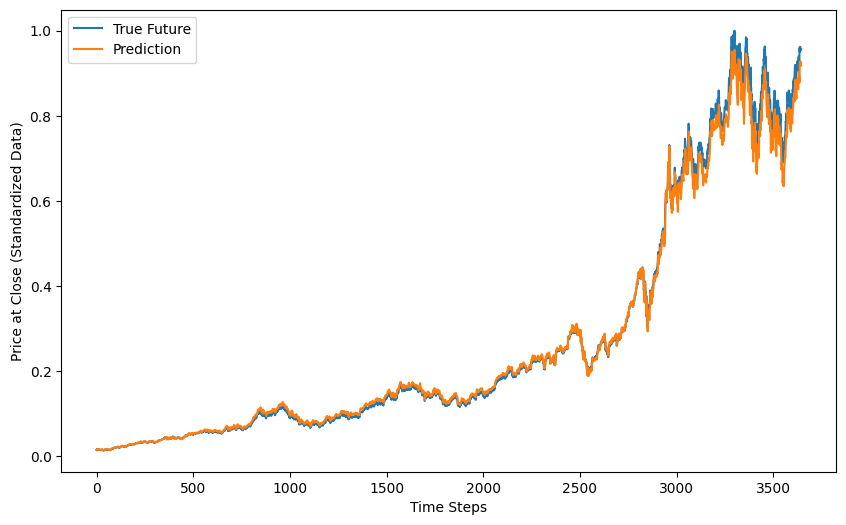

In [47]:
# Plot true future vs prediction plot true future (test data) vs prediction the three models.
plt.figure(figsize=(10, 6))
range_future = len(predictions)
plt.plot(np.arange(range_future), np.array(ytest), 
             label='True Future')     
plt.plot(np.arange(range_future),np.array(predictions),
            label='Prediction')
plt.legend(loc='upper left')
plt.xlabel('Time Steps')
plt.ylabel('Price at Close (Standardized Data)')
plt.show()